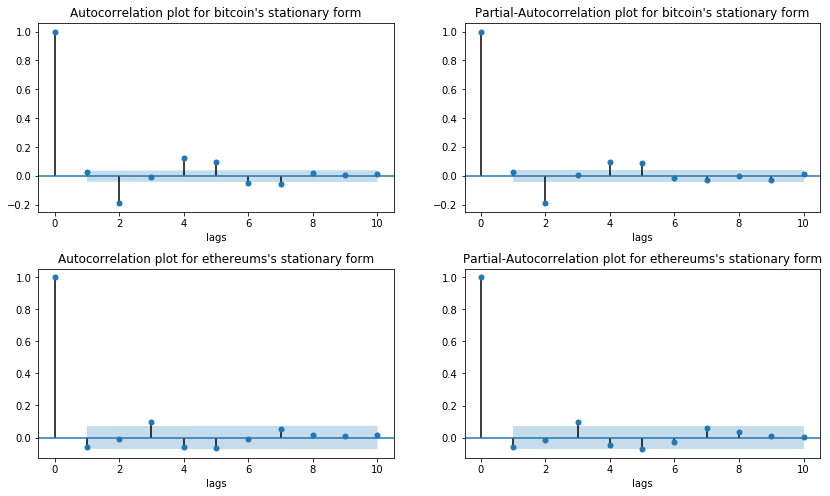

In [2]:
import pandas as pd
import numpy as np
from datetime import date
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt
bitcoin = pd.read_csv('bitcoin.csv').drop('Unnamed: 0',axis=1)
bitcoin['Date'] = pd.to_datetime(bitcoin['Date'])
bitcoin = bitcoin.set_index('Date')
bits_log_shift = (np.log(bitcoin['Price'])-np.log(bitcoin['Price']).shift()).dropna()
ethereum = pd.read_csv('ethereum.csv').drop('Unnamed: 0',axis=1)
ethereum['Date'] = pd.to_datetime(ethereum['Date'])
ethereum = ethereum.set_index('Date')
eth_log_shift = (np.log(ethereum['Price'])-np.log(ethereum['Price']).shift()).dropna()

f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2,figsize=(14,8))

plot_acf(bits_log_shift.values, lags=10, ax=ax1)
ax1.set_title("Autocorrelation plot for bitcoin's stationary form")
ax1.set_xlabel("lags")

plot_pacf(bits_log_shift.values, lags=10, ax=ax2)
ax2.set_title("Partial-Autocorrelation plot for bitcoin's stationary form")
ax2.set_xlabel("lags")

plot_acf(eth_log_shift.values, lags=10, ax=ax3)
ax3.set_title("Autocorrelation plot for ethereums's stationary form")
ax3.set_xlabel("lags")

plot_pacf(eth_log_shift.values, lags=10, ax=ax4)
ax4.set_title("Partial-Autocorrelation plot for ethereums's stationary form")
ax4.set_xlabel("lags")

plt.subplots_adjust(hspace=0.3)
plt.savefig('correlation_plots.png')
plt.show()